**Описание датасета**

* **Home Ownership** - домовладение
* **Annual Income** - годовой доход
* **Years in current job** - количество лет на текущем месте работы
* **Tax Liens** - налоговые льготы
* **Number of Open Accounts** - количество открытых счетов
* **Years of Credit History** - количество лет кредитной истории
* **Maximum Open Credit** - наибольший открытый кредит
* **Number of Credit Problems** - количество проблем с кредитом
* **Months since last delinquent** - количество месяцев с последней просрочки платежа
* **Bankruptcies** - банкротства
* **Purpose** - цель кредита
* **Term** - срок кредита
* **Current Loan Amount** - текущая сумма кредита
* **Current Credit Balance** - текущий кредитный баланс
* **Monthly Debt** - ежемесячный долг
* **Credit Score** - оценка благонадежности клиента (скоринговый балл, полученный из другого источника)
* **Credit Default** - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)

In [1]:
import numpy as np
import pandas as pd


import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
import warnings
warnings.simplefilter('ignore')

### <center>Загрузка данных<a class="anchor" id="course_project"></a><center> 

In [3]:
TRAIN_DATASET_PATH = 'course_project_train.csv'
TEST_DATASET_PATH = 'course_project_test.csv'

In [4]:
df_train = pd.read_csv(TRAIN_DATASET_PATH)
df_test =  pd.read_csv(TEST_DATASET_PATH)

### <center>Обзор датасета<a class="anchor" id="course_project"></a><center> 

#### Обзор тренировочного датасета

In [5]:
df_train.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.00,NaN,0.00,11.00,26.30,685960.00,1.00,nan,1.00,debt consolidation,Short Term,99999999.00,47386.00,7914.00,749.00,0
1,Own Home,1025487.00,10+ years,0.00,15.00,15.30,1181730.00,0.00,nan,0.00,debt consolidation,Long Term,264968.00,394972.00,18373.00,737.00,1
2,Home Mortgage,751412.00,8 years,0.00,11.00,35.00,1182434.00,0.00,nan,0.00,debt consolidation,Short Term,99999999.00,308389.00,13651.00,742.00,0
3,Own Home,805068.00,6 years,0.00,8.00,22.50,147400.00,1.00,nan,1.00,debt consolidation,Short Term,121396.00,95855.00,11338.00,694.00,0
4,Rent,776264.00,8 years,0.00,13.00,13.60,385836.00,1.00,nan,0.00,debt consolidation,Short Term,125840.00,93309.00,7180.00,719.00,0


In [6]:
df_train.shape

(7500, 17)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

#### Обзор количественных признаков

In [8]:
df_train.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,5943.00,7500.00,7500.00,7500.00,7500.00,7500.00,3419.00,7486.00,7500.00,7500.00,7500.00,5943.00,7500.00
mean,1366391.72,0.03,11.13,18.32,945153.73,0.17,34.69,0.12,11873177.45,289833.24,18314.45,1151.09,0.28
std,845339.20,0.27,4.91,7.04,16026216.67,0.50,21.69,0.35,31926122.97,317871.38,11926.76,1604.45,0.45
min,164597.00,0.00,2.00,4.00,0.00,0.00,0.00,0.00,11242.00,0.00,0.00,585.00,0.00
25%,844341.00,0.00,8.00,13.50,279229.50,0.00,16.00,0.00,180169.00,114256.50,10067.50,711.00,0.00
50%,1168386.00,0.00,10.00,17.00,478159.00,0.00,32.00,0.00,309573.00,209323.00,16076.50,731.00,0.00
75%,1640137.00,0.00,14.00,21.80,793501.50,0.00,50.00,0.00,519882.00,360406.25,23818.00,743.00,1.00
max,10149344.00,7.00,43.00,57.70,1304726170.00,7.00,118.00,4.00,99999999.00,6506797.00,136679.00,7510.00,1.00


#### Обзор целевой переменной

In [9]:
df_train['Credit Default'].value_counts(normalize=True)

0   0.72
1   0.28
Name: Credit Default, dtype: float64

#### Обзор номинативных/категориальных признаков

In [10]:
for cat_colname in df_train.select_dtypes(include='object').columns:
    print(str(cat_colname) + '\n\n' + str(df_train[cat_colname].value_counts()) + '\n' + '*' * 100 + '\n')

Home Ownership

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64
****************************************************************************************************

Years in current job

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64
****************************************************************************************************

Purpose

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation  

### <center>Обработка категориальных данных<a class="anchor" id="course_project"></a><center>

Для дальнейшей обработки данных (категориальные данные, пропуски, выбросы) объединим тренировочный и тестовый датасеты.

In [11]:
df = pd.concat([df_train, df_test], axis = 0)
df.shape

(10000, 17)

#### Количество лет на текущем месте работы

In [12]:
years_mapping = {
    '< 1 year': 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years': 10,
}

df['Years in current job'] = df['Years in current job'].map(years_mapping)

#### Домовладение

In [13]:
home_mapping = {
    'Home Mortgage': 1,
    'Rent': 0,
    'Own Home':2,
    'Have Mortgage':1    
}

df['Home Ownership'] = df['Home Ownership'].map(home_mapping)

#### Срок кредита

In [14]:
df.loc[df['Term'] == 'Short Term', 'Term'] = 0
df.loc[df['Term'] == 'Long Term', 'Term'] = 1
df['Term'] = df['Term'].astype(int)

#### Цель кредита

In [15]:
df.loc [df['Purpose']!= 'debt consolidation', 'Purpose'] = 1
df.loc[df['Purpose'] == 'debt consolidation', 'Purpose'] = 0
df['Purpose'] = df['Purpose'].astype(int)

### <center>Обработка пропусков<a class="anchor" id="course_project"></a><center>

In [16]:
df.isnull().sum()

Home Ownership                     0
Annual Income                   2070
Years in current job             457
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    5439
Bankruptcies                      17
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                    2070
Credit Default                  2500
dtype: int64

Смотрим количество данных, в которых пропущено 4 параметра и больше

In [17]:
df[df.isnull().sum(axis=1)>=4].count()

Home Ownership                  324
Annual Income                     0
Years in current job            272
Tax Liens                       324
Number of Open Accounts         324
Years of Credit History         324
Maximum Open Credit             324
Number of Credit Problems       324
Months since last delinquent      9
Bankruptcies                    323
Purpose                         324
Term                            324
Current Loan Amount             324
Current Credit Balance          324
Monthly Debt                    324
Credit Score                      0
Credit Default                   38
dtype: int64

In [18]:
df = df.drop(df[df.isnull().sum(axis=1)>=4].index)

#### Банкротства

In [19]:
df['Bankruptcies'].describe()

count   9370.00
mean       0.11
std        0.35
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        5.00
Name: Bankruptcies, dtype: float64

In [20]:
df['Bankruptcies'].unique()

array([ 1.,  0.,  3., nan,  2.,  4.,  5.])

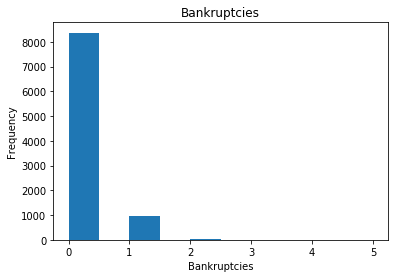

In [21]:
df['Bankruptcies'].plot.hist(title = 'Bankruptcies');
plt.xlabel('Bankruptcies');

Целесообразным представляется заменить пропущенные значения на медиану

In [22]:
df.loc[df['Bankruptcies'].isnull(), 'Bankruptcies'] = df['Bankruptcies'].median()

#### Количество лет на текущем месте работы

In [23]:
df['Years in current job'].describe()

count   8997.00
mean       5.89
std        3.63
min        0.00
25%        3.00
50%        6.00
75%       10.00
max       10.00
Name: Years in current job, dtype: float64

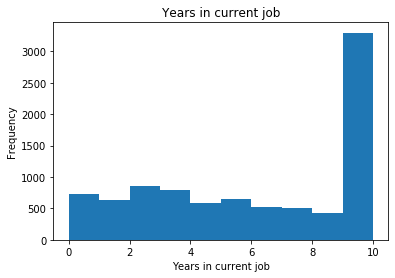

In [24]:
df['Years in current job'].plot.hist(title = 'Years in current job');
plt.xlabel('Years in current job');

In [25]:
df.loc[df['Years in current job'].isnull(), 'Years in current job'] = df['Years in current job'].median()

#### Годовой доход

In [26]:
df['Annual Income'].describe()

count       7704.00
mean     1368358.40
std       867196.50
min       106533.00
25%       847115.00
50%      1170875.00
75%      1641495.50
max     14975610.00
Name: Annual Income, dtype: float64

Прежде чем заполнить пропуски в этом столбце, необходимо избавиться от выбросов

In [27]:
df[df['Annual Income'] == 14975610]

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
194,0,14975610.00,5.00,0.00,5.00,44.30,155518.00,0.00,nan,0.00,1,1,133386.00,103968.00,3369.00,738.00,nan


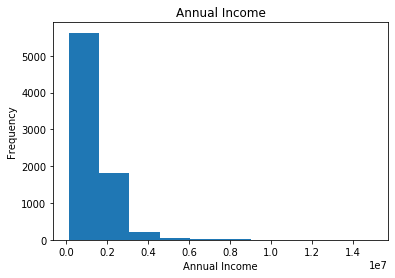

In [28]:
df['Annual Income'].plot.hist(title = 'Annual Income');
plt.xlabel('Annual Income');

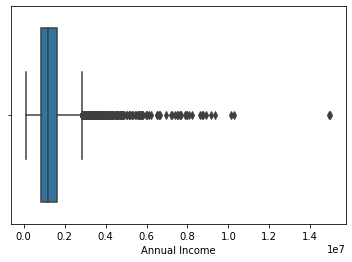

In [29]:
sns.boxplot(df['Annual Income'])

Т.к. неизвестно, данные какой страны, какого года представлены, исходя из минимальной зарплаты (13716 в месяц), средней (97 365,5 в месяц) и моды (97 365,5), предположим, что максимальные значения не превзойдут 250 тыс в месяц или 3 млн. в год.
Предположим, что ошибка заключается в лишнем нуле. Для того, чтобы избавиться от выбросов, поделим их на 10.


In [30]:
df.loc[df['Annual Income']>=3000000, 'Annual Income'] = df.loc[df['Annual Income']>=3000000, 'Annual Income']/10

In [31]:
df['Annual Income'].describe()

count      7704.00
mean    1218275.54
std      570198.05
min      106533.00
25%      789697.00
50%     1129654.50
75%     1546239.00
max     2997497.00
Name: Annual Income, dtype: float64

Заполним недостающие данные медианой

In [32]:
df.loc[df['Annual Income'].isnull(), 'Annual Income'] = df['Annual Income'].median()

#### Ооценка благонадежности клиента (скоринговый балл, полученный из другого источника)

In [33]:
df['Credit Score'].describe()

count   7704.00
mean    1172.74
std     1641.30
min      585.00
25%      711.00
50%      731.00
75%      743.00
max     7510.00
Name: Credit Score, dtype: float64

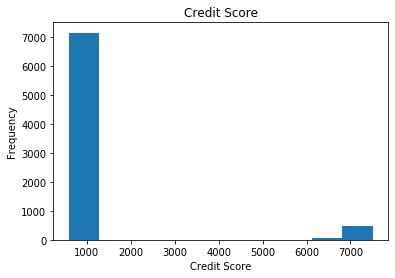

In [34]:
df['Credit Score'].plot.hist(title = 'Credit Score');
plt.xlabel('Credit Score');

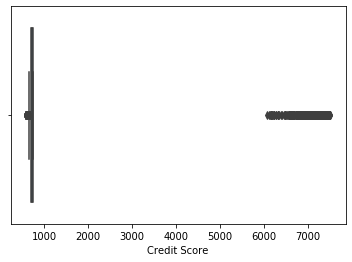

In [35]:
sns.boxplot(df['Credit Score'])

Т.к. по найденной в интернете информации кредитный скоринг считается в диапазоне до 1200 баллов, предположительно, ошибка в данных в том, что во всех ячейчах >1200 просто приписан дополнительный ноль. Поэтому убираем этот ноль и присваеваем пропущенным данным значение медианы.

In [36]:
df.loc[df['Credit Score']>1200, 'Credit Score'] = df.loc[df['Credit Score']>1200, 'Credit Score']//10

df.loc[df['Credit Score'].isnull(), 'Credit Score'] = df['Credit Score'].median()

#### Количество месяцев с последней просрочки платежа

In [37]:
df['Months since last delinquent'].describe()

count   4426.00
mean      34.62
std       21.76
min        0.00
25%       16.00
50%       32.00
75%       50.00
max      118.00
Name: Months since last delinquent, dtype: float64

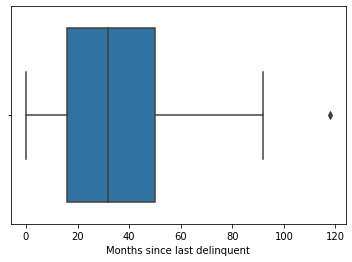

In [38]:
sns.boxplot(df['Months since last delinquent'])

В данном случае также сначала избавляемся то выброса (меняем выброс на значение медианы), а затем меням на медиану нулевые значения.

In [39]:
df.loc[df['Months since last delinquent']==118, 'Months since last delinquent'] = df['Months since last delinquent'].median()

df.loc[df['Months since last delinquent'].isnull(), 'Months since last delinquent'] = df['Months since last delinquent'].median()

In [40]:
df.isnull().sum()

Home Ownership                     0
Annual Income                      0
Years in current job               0
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent       0
Bankruptcies                       0
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                       0
Credit Default                  2205
dtype: int64

### <center>Обработка выбросов<a class="anchor" id="course_project"></a><center> 

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9384 entries, 0 to 2499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                9384 non-null   int64  
 1   Annual Income                 9384 non-null   float64
 2   Years in current job          9384 non-null   float64
 3   Tax Liens                     9384 non-null   float64
 4   Number of Open Accounts       9384 non-null   float64
 5   Years of Credit History       9384 non-null   float64
 6   Maximum Open Credit           9384 non-null   float64
 7   Number of Credit Problems     9384 non-null   float64
 8   Months since last delinquent  9384 non-null   float64
 9   Bankruptcies                  9384 non-null   float64
 10  Purpose                       9384 non-null   int32  
 11  Term                          9384 non-null   int32  
 12  Current Loan Amount           9384 non-null   float64
 13  Cur

In [42]:
df.describe()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,9384.00,9384.00,9384.00,9384.00,9384.00,9384.00,9384.00,9384.00,9384.00,9384.00,9384.00,9384.00,9384.00,9384.00,9384.00,9384.00,7179.00
mean,0.67,1202409.88,5.90,0.03,11.15,18.34,899322.77,0.17,33.23,0.11,0.21,0.26,12262090.72,292344.12,18344.41,721.32,0.28
std,0.63,517752.23,3.55,0.31,4.90,7.07,14346159.60,0.52,14.97,0.35,0.41,0.44,32383892.23,334663.01,11870.88,25.45,0.45
min,0.00,106533.00,0.00,0.00,1.00,3.90,0.00,0.00,0.00,0.00,0.00,0.00,15422.00,0.00,0.00,585.00,0.00
25%,0.00,863436.00,3.00,0.00,8.00,13.50,277321.00,0.00,32.00,0.00,0.00,0.00,181489.00,112731.75,10111.00,714.00,0.00
50%,1.00,1129654.50,6.00,0.00,10.00,17.00,477466.00,0.00,32.00,0.00,0.00,0.00,313456.00,208705.50,16211.50,728.00,0.00
75%,1.00,1437853.50,10.00,0.00,14.00,22.00,795168.00,0.00,32.00,0.00,0.00,1.00,526685.50,361665.00,23899.50,738.00,1.00
max,2.00,2997497.00,10.00,15.00,48.00,57.70,1304726170.00,15.00,92.00,5.00,1.00,1.00,99999999.00,6506797.00,136679.00,751.00,1.00


#### Количество открытых счетов

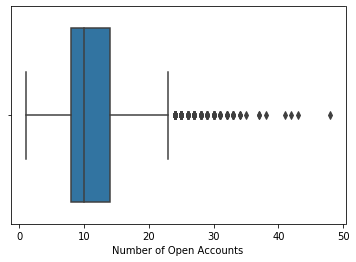

In [43]:
sns.boxplot(df['Number of Open Accounts'])

Маловероятно, что количество открытых счетов превышает 20, поэтому заменим выбросы на медиану

In [44]:
df.loc[df['Number of Open Accounts']>20, 'Number of Open Accounts'] = df['Number of Open Accounts'].median()

#### Количество лет кредитной истории

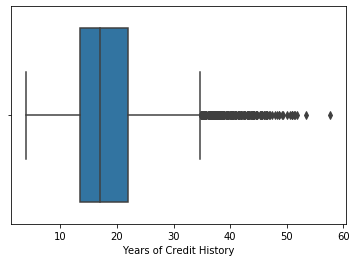

In [45]:
sns.boxplot(df['Years of Credit History'])

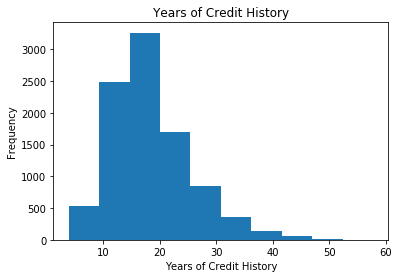

In [46]:
df['Years of Credit History'].plot.hist(title = 'Years of Credit History');
plt.xlabel('Years of Credit History');

По закону в России кредитная история хранится 10 лет (до 2015 года этот срок составлял 15 лет). Т.к. год, когда получены эти данные неизвестен, предположим, что во всех данные больше 15 лет указано не количество лет, а количество месяцев. При этом страна, в которой были получены данные также неизвестна. Распределение похоже на реальные данные, поэтому обработаем только правый хвост.
За гипотезу примем, что ошибка заключается в том, что указано е количество лет, а количество месяцев.

In [47]:
df.loc[df['Years of Credit History']>35, 'Years of Credit History'] = df.loc[df['Years of Credit History']>35, 'Years of Credit History']//12

#### Наибольший открытый кредит 

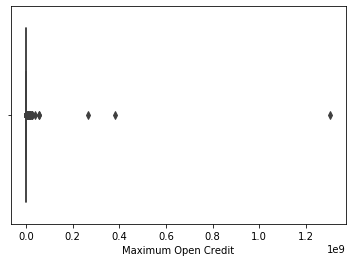

In [48]:
sns.boxplot(df['Maximum Open Credit'])


In [49]:
df['Maximum Open Credit'].describe()

count         9384.00
mean        899322.77
std       14346159.60
min              0.00
25%         277321.00
50%         477466.00
75%         795168.00
max     1304726170.00
Name: Maximum Open Credit, dtype: float64

Вероятно, самые большие выбросы произошли из-за склейки цифр\опечатки

In [50]:
df.loc[df['Maximum Open Credit']==1304726170, 'Maximum Open Credit'] = 130472

df.loc[df['Maximum Open Credit']==380052288, 'Maximum Open Credit'] = 380052

df.loc[df['Maximum Open Credit']==265512874, 'Maximum Open Credit'] = 265512

In [51]:
df['Maximum Open Credit'].describe()

count       9384.00
mean      691573.91
std      1345680.80
min            0.00
25%       277238.50
50%       477158.00
75%       794359.50
max     57562560.00
Name: Maximum Open Credit, dtype: float64

Предположим, что кредит выше 5 млн также является выбрсом, меняем на медиану

In [52]:
df.loc[df['Maximum Open Credit']>5000000, 'Maximum Open Credit'] = df['Maximum Open Credit'].median()

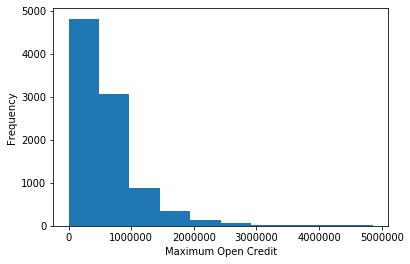

In [53]:
df['Maximum Open Credit'].plot.hist();
plt.xlabel('Maximum Open Credit');

#### Количество проблем с кредитом

In [54]:
df['Number of Credit Problems'].describe()

count   9384.00
mean       0.17
std        0.52
min        0.00
25%        0.00
50%        0.00
75%        0.00
max       15.00
Name: Number of Credit Problems, dtype: float64

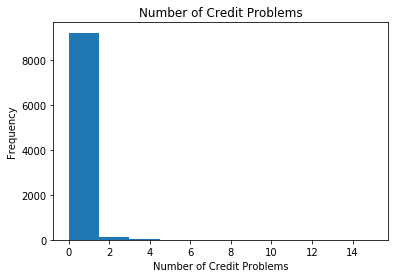

In [55]:
df['Number of Credit Problems'].plot.hist(title = 'Number of Credit Problems');
plt.xlabel('Number of Credit Problems');

Количество проблем с кредитом больше 5 составляет 0,74% наблюдений из всего датасета. При этом в данных наблюдениях достаточно высокий кредитный скоринг и целевая переменная = 0, поэтому предположим, что это выбросы и заменим на медиану

In [56]:
df.loc[df['Number of Credit Problems']>5, 'Number of Credit Problems'] = df['Number of Credit Problems'].median()

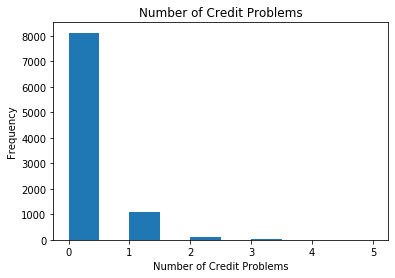

In [57]:
df['Number of Credit Problems'].plot.hist(title = 'Number of Credit Problems');
plt.xlabel('Number of Credit Problems');

#### Текущая сумма кредита

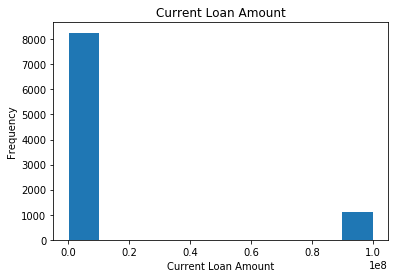

In [58]:
df['Current Loan Amount'].plot.hist(title = 'Current Loan Amount');
plt.xlabel('Current Loan Amount');

In [59]:
df['Current Loan Amount'].describe()

count       9384.00
mean    12262090.72
std     32383892.23
min        15422.00
25%       181489.00
50%       313456.00
75%       526685.50
max     99999999.00
Name: Current Loan Amount, dtype: float64

In [60]:
df[df['Current Loan Amount']==99999999].count()

Home Ownership                  1125
Annual Income                   1125
Years in current job            1125
Tax Liens                       1125
Number of Open Accounts         1125
Years of Credit History         1125
Maximum Open Credit             1125
Number of Credit Problems       1125
Months since last delinquent    1125
Bankruptcies                    1125
Purpose                         1125
Term                            1125
Current Loan Amount             1125
Current Credit Balance          1125
Monthly Debt                    1125
Credit Score                    1125
Credit Default                   828
dtype: int64

В 1125 наблюдениях текущая сумма кредита = 99999999, что очевидно, является ошибкой. Заменим эти данные на медиану. При этом для более точных данных возьмем часть датасета без выбросов, т.к. они сильно влияют на статистику по столбцу.

In [61]:
df.loc[df['Current Loan Amount']==99999999, 'Current Loan Amount'] = df.loc[df['Current Loan Amount']!=99999999, 'Current Loan Amount'].median()

#### Текущий кредитный баланс

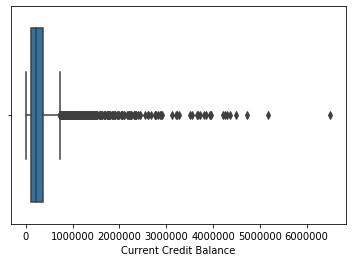

In [62]:
sns.boxplot(df['Current Credit Balance'])

Т.к.по нашим данным самы большой кредит = 789096, то и кредитный баланс не может превышат эту сумму.

In [63]:
df.loc[df['Current Credit Balance']>789096,  'Current Credit Balance'] = df.loc[df['Current Credit Balance']<789096,  'Current Credit Balance'].median()

#### Ежемесячный долг

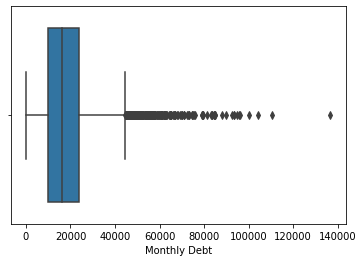

In [64]:
sns.boxplot(df['Monthly Debt'])

In [65]:
df.loc[df['Monthly Debt']>100000, 'Monthly Debt'] = df['Monthly Debt'].mean()

### Сохранение датасета

In [67]:
df.to_csv('course_project_data_prep.csv', index=False, encoding='utf-8')